In [104]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import optuna
from catboost import CatBoostClassifier
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)

1.2.2


In [53]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [54]:
ids = df_test['PassengerId']

df_all = [df_train, df_test]
for df in df_all:
    df.drop('Name', axis = 1, inplace= True)

In [55]:
df_train.isna().sum(axis=0)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [56]:
print(df_train.info())
df_train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN


0
0


Text(0.5, 1.0, 'Age group distribution')

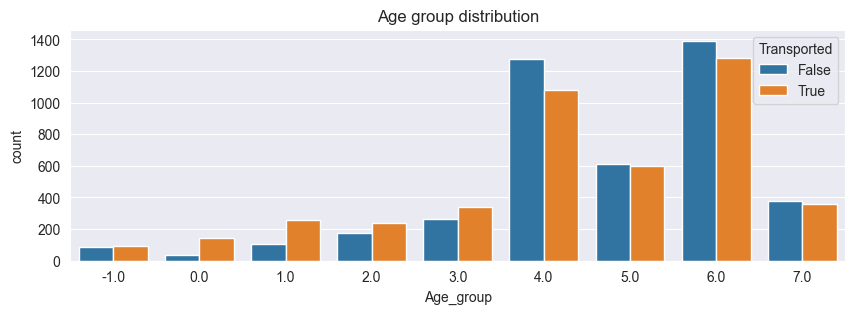

In [57]:
for dataset in df_all:
    dataset['Age_group'] = np.nan
    dataset.loc[(dataset['Age'] > 0) & (dataset['Age'] < 7), 'Age_group'] = 1
    dataset.loc[(dataset['Age'] >= 7) & (dataset['Age'] < 14), 'Age_group'] = 2
    dataset.loc[(dataset['Age'] >= 14) & (dataset['Age'] < 18), 'Age_group'] = 3
    dataset.loc[(dataset['Age'] >= 18) & (dataset['Age'] <= 25), 'Age_group'] = 4
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age_group'] = 5
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 50), 'Age_group'] = 6
    dataset.loc[dataset['Age'] > 50, 'Age_group'] = 7
    dataset.loc[dataset['Age'].isna(), 'Age_group'] = -1
    dataset.loc[dataset['Age'] == 0, 'Age_group'] = 0
    print(dataset['Age_group'].isna().sum(axis=0))

plt.figure(figsize=(10, 3))
sns.countplot(data=df_train, x='Age_group', hue='Transported')
plt.title('Age group distribution')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group,Expenditure,No_spending
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693,8693.000000,8693.000000,8693.000000
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,4378,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,4.536294,1440.866329,0.420223
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,1.821467,2803.045694,0.493623
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,4.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.000000,716.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,6.000000,1441.000000,1.000000


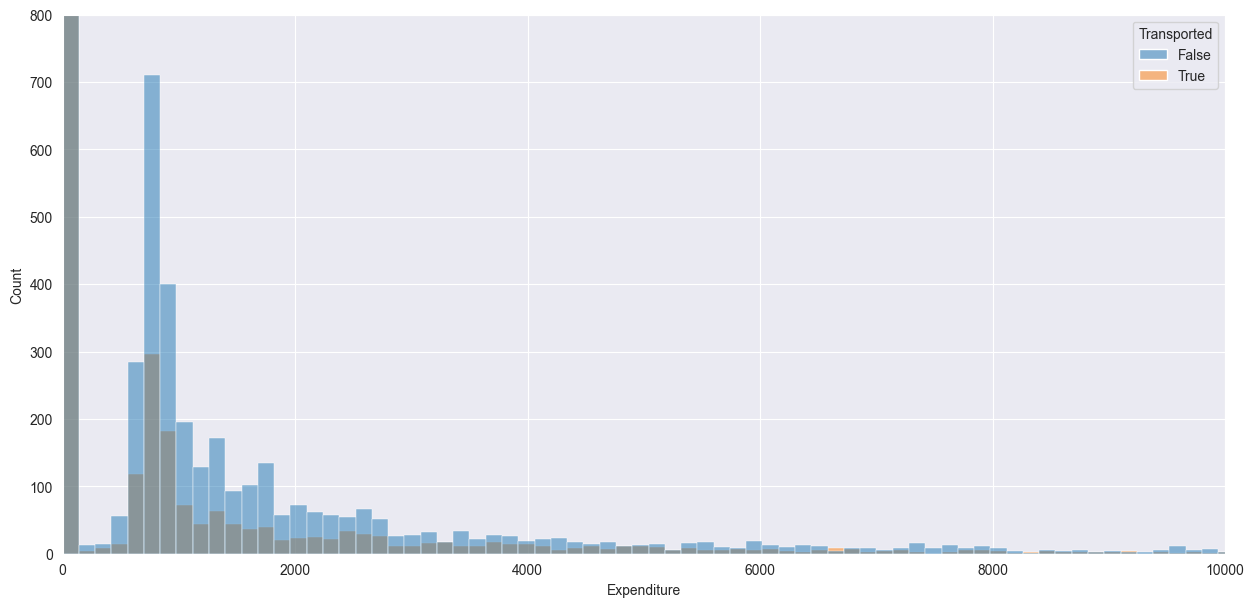

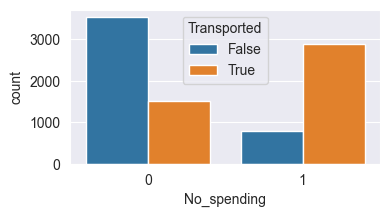

In [58]:
for dataset in df_all: 
    dataset['Expenditure']=dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
    dataset['No_spending']=(dataset['Expenditure']==0).astype(int)

fig=plt.figure(figsize=(15,7))
sns.histplot(data=df_train, x='Expenditure', hue='Transported')
plt.ylim([0,800])
plt.xlim([0,10000])

fig=plt.figure(figsize=(4,2))
sns.countplot(data=df_train, x='No_spending', hue='Transported')

df_train.describe(include='all')

<Axes: xlabel='Age_group', ylabel='count'>

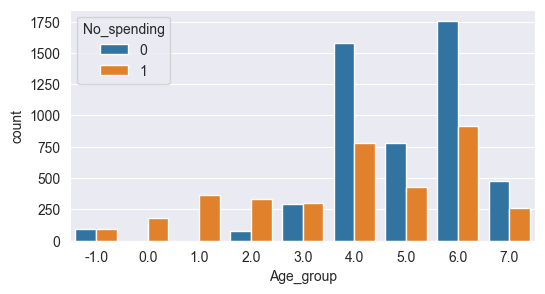

In [59]:
fig=plt.figure(figsize=(6,3))
sns.countplot(data=df_train, x='Age_group', hue='No_spending')

<Axes: xlabel='Age_group', ylabel='Expenditure'>

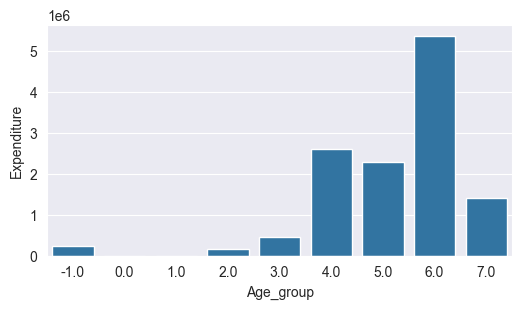

In [60]:
grouped_data = df_train.groupby('Age_group')['Expenditure'].sum().reset_index()

fig=plt.figure(figsize=(6,3))
sns.barplot(data=grouped_data, x='Age_group', y='Expenditure')

(0.0, 10000.0)

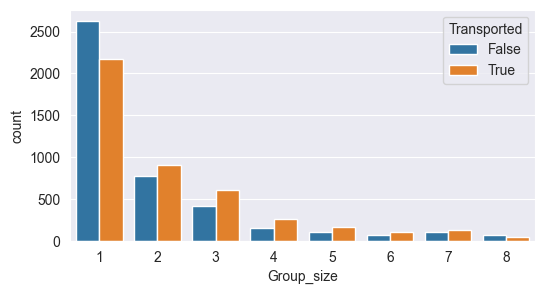

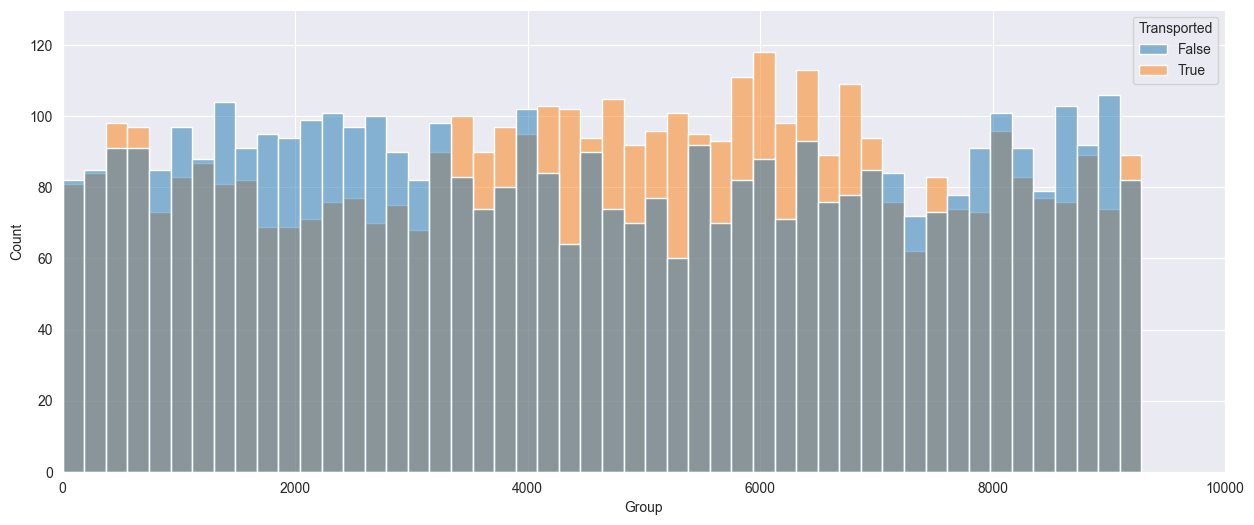

In [61]:
for dataset in df_all: 
    dataset['Group'] = dataset['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    dataset['Group_size']=dataset['Group'].map(lambda x: dataset['Group'].value_counts()[x])
    
fig = plt.figure(figsize= (6,3))
sns.countplot(data=df_train, x='Group_size', hue='Transported')

fig = plt.figure(figsize= (15,6))
sns.histplot(data=df_train, x='Group', hue='Transported', bins=50)
plt.ylim([0,130])
plt.xlim([0,10000])

In [62]:
for dataset in df_all: 
    dataset['Cabin'] = dataset['Cabin'].fillna('Z/9999/Z')
    dataset['Cabin_deck'] = dataset['Cabin'].apply(lambda x: x.split('/')[0])
    dataset['Cabin_number'] = dataset['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    dataset['Cabin_side'] = dataset['Cabin'].apply(lambda x: x.split('/')[2])
    
    dataset.loc[dataset['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
    dataset.loc[dataset['Cabin_number']==9999, 'Cabin_number']=np.nan
    dataset.loc[dataset['Cabin_side']=='Z', 'Cabin_side']=np.nan

    dataset.drop('Cabin', axis=1, inplace=True)

In [63]:
print(df_train.Cabin_deck.unique())
print(df_train.Cabin_number.unique())
print(df_train.Cabin_side.unique())
df_train[['Cabin_deck', 'Cabin_number', 'Cabin_side']].describe(include='all')

['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
[0.000e+00 1.000e+00 2.000e+00 ... 1.892e+03 1.893e+03 1.894e+03]
['P' 'S' nan]


,Cabin_deck,Cabin_number,Cabin_side
count,8494,8494.000000,8494
unique,8,NaN,2
top,F,NaN,S
freq,2794,NaN,4288
mean,NaN,600.367671,NaN
std,NaN,511.867226,NaN
min,NaN,0.000000,NaN
25%,NaN,167.250000,NaN
50%,NaN,427.000000,NaN
75%,NaN,999.000000,NaN


<Axes: xlabel='Cabin_side', ylabel='count'>

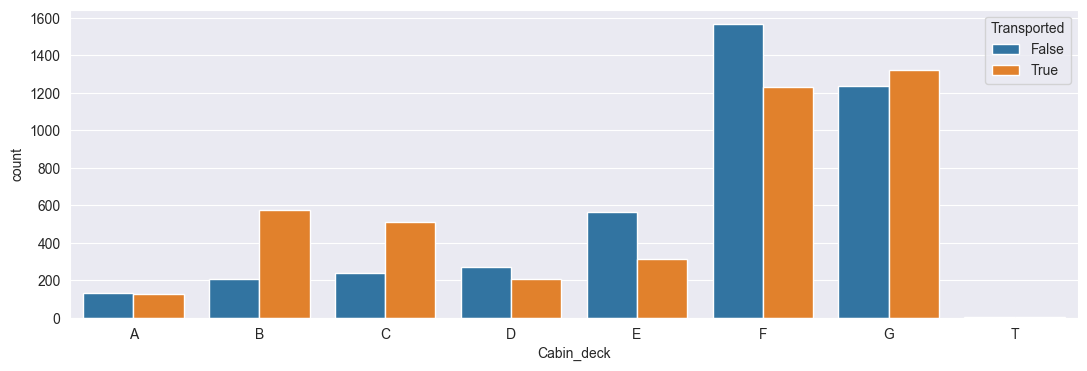

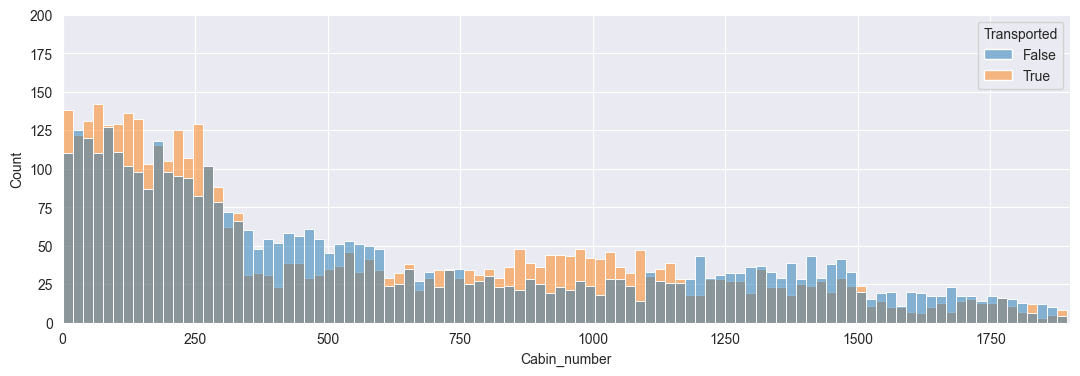

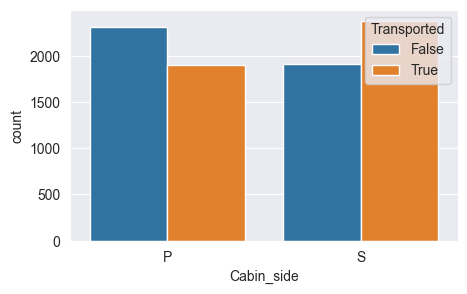

In [64]:
fig=plt.figure(figsize=(13, 4))
sns.countplot(data=df_train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])

fig=plt.figure(figsize=(13, 4))
sns.histplot(data=df_train, x='Cabin_number', hue='Transported', bins=100)
plt.xlim(0, 1900)
plt.ylim(0, 200)

fig=plt.figure(figsize=(5, 3))
sns.countplot(data=df_train, x='Cabin_side', hue='Transported')

<Axes: xlabel='Group', ylabel='Count'>

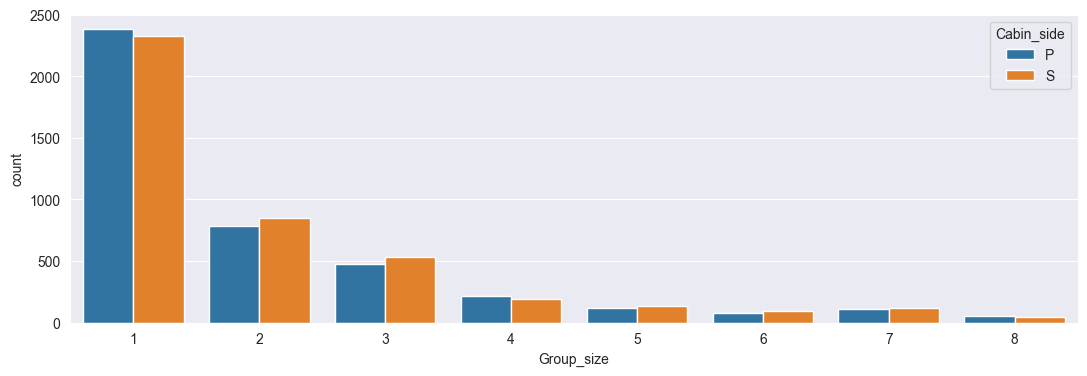

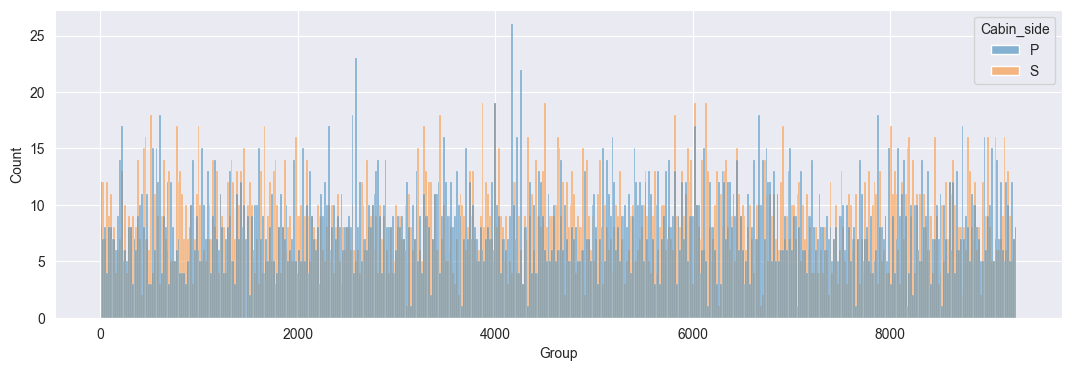

In [65]:
fig=plt.figure(figsize=(13, 4))
sns.countplot(data=df_train, x='Group_size', hue='Cabin_side')

fig=plt.figure(figsize=(13, 4))
sns.histplot(data=df_train, x='Group', hue='Cabin_side', bins=500)

<Axes: xlabel='HomePlanet', ylabel='count'>

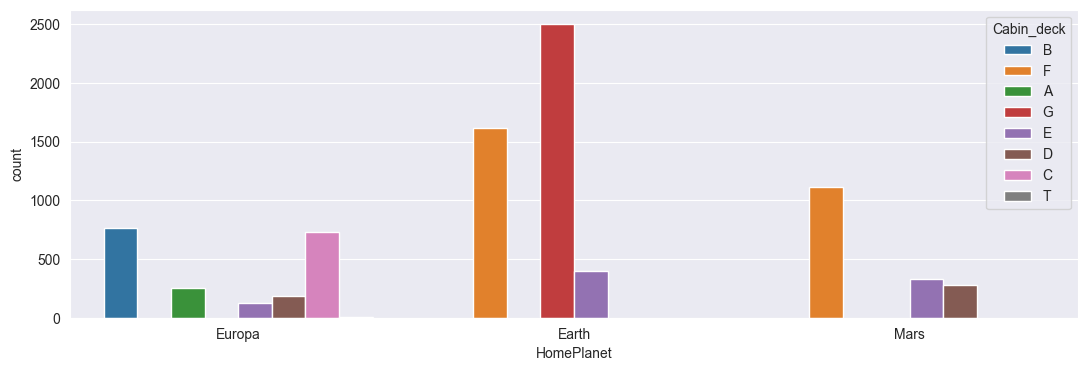

In [66]:
fig=plt.figure(figsize=(13, 4))
sns.countplot(data=df_train, x='HomePlanet', hue='Cabin_deck')

(0.0, 10.0)

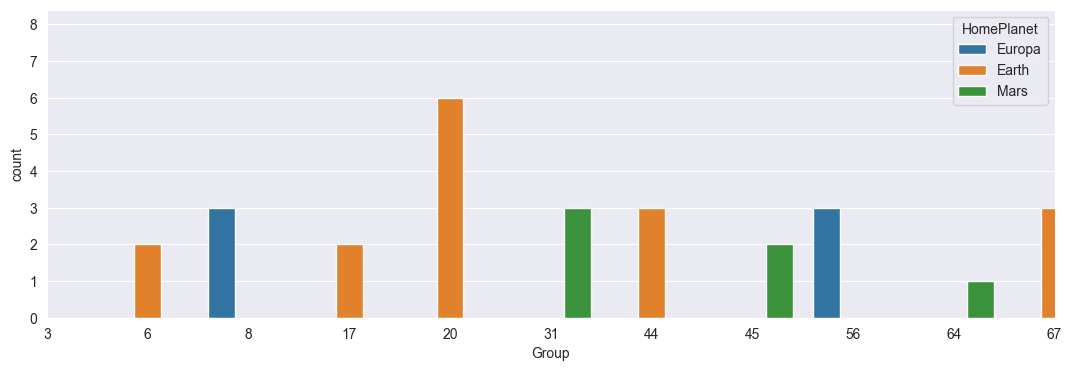

In [67]:
fig=plt.figure(figsize=(13, 4))
sns.countplot(data=df_train[df_train['Group_size'] > 1], x='Group', hue='HomePlanet')
plt.xlim(0, 10)

In [68]:
df_train['Cabin_number'].describe(include='all')

count    8494.000000
mean      600.367671
std       511.867226
min         0.000000
25%       167.250000
50%       427.000000
75%       999.000000
max      1894.000000
Name: Cabin_number, dtype: float64

<Axes: xlabel='Cabin_number_group', ylabel='count'>

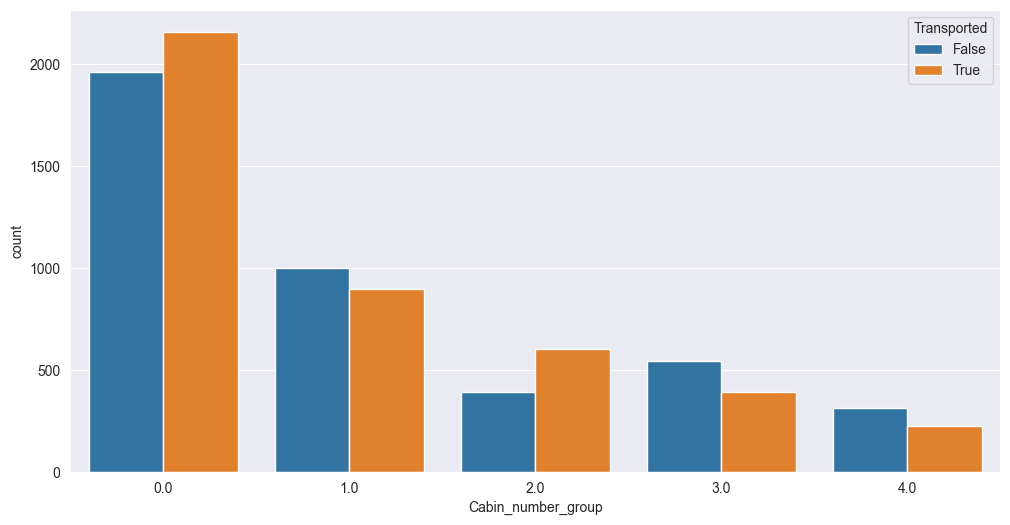

In [69]:
for dataset in df_all:
    dataset['Cabin_number_group'] = np.nan
    dataset.loc[dataset['Cabin_number'] < 400, 'Cabin_number_group'] = 0
    dataset.loc[(dataset['Cabin_number'] >= 400) & (dataset['Cabin_number'] < 900), 'Cabin_number_group'] = 1
    dataset.loc[(dataset['Cabin_number'] >= 900) & (dataset['Cabin_number'] <= 1200), 'Cabin_number_group'] = 2
    dataset.loc[(dataset['Cabin_number'] > 1200) & (dataset['Cabin_number'] <= 1500), 'Cabin_number_group'] = 3
    dataset.loc[(dataset['Cabin_number'] > 1500) & (dataset['Cabin_number'] < 9999), 'Cabin_number_group'] = 4
    dataset.loc[dataset['Cabin_number'] >= 9999, 'Cabin_number_group'] = 5
    
fig = plt.figure(figsize=(12,6))
sns.countplot(data=df_train, x='Cabin_number_group', hue='Transported')

In [70]:
for df in df_all:
    print(df.isna().sum(axis=0), '\n')

PassengerId             0
HomePlanet            201
CryoSleep             217
Destination           182
Age                   179
VIP                   203
RoomService           181
FoodCourt             183
ShoppingMall          208
Spa                   183
VRDeck                188
Transported             0
Age_group               0
Expenditure             0
No_spending             0
Group                   0
Group_size              0
Cabin_deck            199
Cabin_number          199
Cabin_side            199
Cabin_number_group    199
dtype: int64 

PassengerId             0
HomePlanet             87
CryoSleep              93
Destination            92
Age                    91
VIP                    93
RoomService            82
FoodCourt             106
ShoppingMall           98
Spa                   101
VRDeck                 80
Age_group               0
Expenditure             0
No_spending             0
Group                   0
Group_size              0
Cabin_deck            1

In [71]:
for dataset in df_all:
    GHP_gb=dataset.groupby(['Group', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

    GHP_index=dataset[dataset['HomePlanet'].isna()][(dataset[dataset['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

    dataset.loc[GHP_index,'HomePlanet']=dataset.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

    print(dataset['HomePlanet'].isna().sum())

111
46


In [72]:
for dataset in df_all:
    CH_gb=dataset.groupby(['Cabin_deck', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

    GHP_index=dataset[dataset['HomePlanet'].isna()][(dataset[dataset['HomePlanet'].isna()]['Cabin_deck']).isin(CH_gb.index)].index

    dataset.loc[GHP_index,'HomePlanet']=dataset.iloc[GHP_index,:]['Cabin_deck'].map(lambda x: CH_gb.idxmax(axis=1)[x])

    print(dataset['HomePlanet'].isna().sum())
print(df_train[df_train['HomePlanet'].isna()].head())

4
1
     PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
1550     1645_01        NaN      True  55 Cancri e  18.0  False          0.0   
1714     1823_01        NaN     False  TRAPPIST-1e  67.0  False        143.0   
3858     4134_01        NaN      True  TRAPPIST-1e  40.0  False          0.0   
7293     7801_01        NaN     False  55 Cancri e  21.0  False       1720.0   

      FoodCourt  ShoppingMall    Spa  ...  Transported  Age_group  \
1550        0.0           0.0    0.0  ...        False        4.0   
1714       68.0         496.0  182.0  ...         True        7.0   
3858        0.0           0.0    0.0  ...         True        6.0   
7293     2337.0           0.0    1.0  ...        False        4.0   

      Expenditure  No_spending  Group  Group_size  Cabin_deck Cabin_number  \
1550          0.0            1   1645           1         NaN          NaN   
1714        898.0            0   1823           1         NaN          NaN   
3858          0

In [73]:
def replace_mean(table, column):
    val = table[column].mean()
    table[column] = table[column].fillna(val)


def replace_mode(table, column):
    val = table[column].mode()[0]
    table[column] = table[column].fillna(val)
    
for dataset in df_all:
    replace_mode(dataset, 'HomePlanet')
    print(dataset['HomePlanet'].isna().sum())

0
0


<Axes: xlabel='CryoSleep', ylabel='count'>

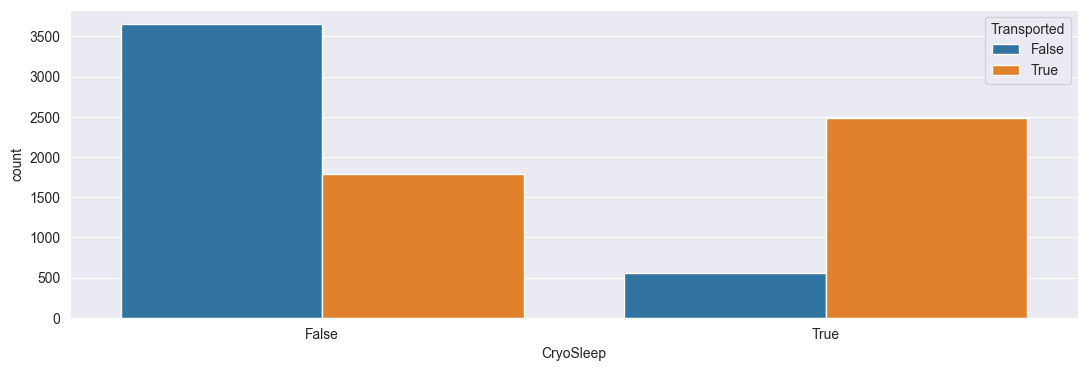

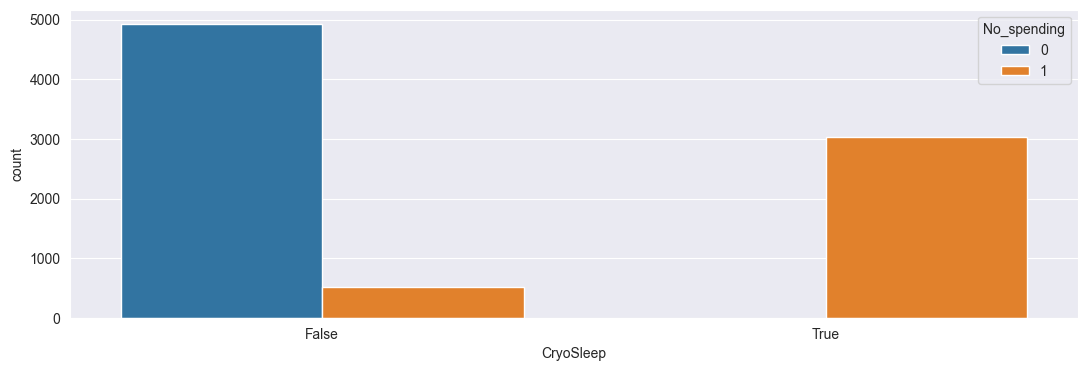

In [74]:
fig=plt.figure(figsize=(13, 4))
sns.countplot(data=df_train, x='CryoSleep', hue='Transported')

fig=plt.figure(figsize=(13, 4))
sns.countplot(data=df_train, x='CryoSleep', hue='No_spending')

In [75]:
for dataset in df_all:
    dataset.loc[dataset['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
    dataset.loc[dataset['CryoSleep'].isna() & dataset['No_spending'] == True, 'CryoSleep'] = 0
    dataset.loc[dataset['CryoSleep'].isna(), 'CryoSleep'] = False
    print(dataset['CryoSleep'].isna().sum())

0
0


In [76]:
for dataset in df_all:
    GD_gb=dataset.groupby(['Group', 'Destination'])['Destination'].size().unstack().fillna(0)

    GHP_index=dataset[dataset['Destination'].isna()][(dataset[dataset['Destination'].isna()]['Group']).isin(GD_gb.index)].index

    dataset.loc[GHP_index,'Destination']=dataset.iloc[GHP_index,:]['Group'].map(lambda x: GD_gb.idxmax(axis=1)[x])

    print(dataset['Destination'].isna().sum())
print('\n')

for dataset in df_all:
    GD_gb=dataset.groupby(['Cabin_deck', 'Destination'])['Destination'].size().unstack().fillna(0)

    GHP_index=dataset[dataset['Destination'].isna()][(dataset[dataset['Destination'].isna()]['Cabin_deck']).isin(GD_gb.index)].index

    dataset.loc[GHP_index,'Destination']=dataset.iloc[GHP_index,:]['Cabin_deck'].map(lambda x: GD_gb.idxmax(axis=1)[x])

    print(dataset['Destination'].isna().sum())
print('\n')

for dataset in df_all:
    replace_mode(dataset, 'Destination')
    print(dataset['Destination'].isna().sum())

103
51


2
0


0
0


In [77]:
df_train.isna().sum(axis = 0)

PassengerId             0
HomePlanet              0
CryoSleep               0
Destination             0
Age                   179
VIP                   203
RoomService           113
FoodCourt             113
ShoppingMall          112
Spa                   118
VRDeck                126
Transported             0
Age_group               0
Expenditure             0
No_spending             0
Group                   0
Group_size              0
Cabin_deck            199
Cabin_number          199
Cabin_side            199
Cabin_number_group    199
dtype: int64

In [78]:
for data in df_all:
    GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
    GCN_gb=data[data['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
    GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

    GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index
    data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])
    
    data['Cabin_side'] = data['Cabin_side'].fillna('Z')
    print(data['Cabin_side'].isna().sum(axis=0))
    
    GCN_index=data[data['Cabin_number'].isna()][(data[data['Cabin_number'].isna()]['Group']).isin(GCN_gb.index)].index
    data.loc[GCN_index,'Cabin_number']=data.iloc[GCN_index,:]['Group'].map(lambda x: GCN_gb.idxmax(axis=1)[x])
    
    GCD_index=data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index
    data.loc[GCD_index,'Cabin_deck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])
    
    na_rows_CD=data.loc[data['Cabin_deck'].isna() & data['Group_size'] == 1,'Cabin_deck'].index
    data.loc[data['Cabin_deck'].isna(),'Cabin_deck']=data[data['Group_size'] == 1].groupby(['HomePlanet','Destination',])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]
    
    data['Cabin_deck'] = data['Cabin_deck'].fillna('F')
    print(data['Cabin_deck'].isna().sum(axis=0))
    
    data['Cabin_number'] = data['Cabin_number'].fillna(9999)
    print(data['Cabin_number'].isna().sum(axis=0))

0
0
0
0
0
0


In [79]:
for dataset in df_all:
    dataset['Cabin_number_group'] = np.nan
    dataset.loc[dataset['Cabin_number'] < 400, 'Cabin_number_group'] = 0
    dataset.loc[(dataset['Cabin_number'] >= 400) & (dataset['Cabin_number'] < 900), 'Cabin_number_group'] = 1
    dataset.loc[(dataset['Cabin_number'] >= 900) & (dataset['Cabin_number'] <= 1200), 'Cabin_number_group'] = 2
    dataset.loc[(dataset['Cabin_number'] > 1200) & (dataset['Cabin_number'] <= 1500), 'Cabin_number_group'] = 3
    dataset.loc[(dataset['Cabin_number'] > 1500) & (dataset['Cabin_number'] < 9999), 'Cabin_number_group'] = 4
    dataset.loc[dataset['Cabin_number'] >= 9999, 'Cabin_number_group'] = 5

In [80]:
for data in df_all:
    data.groupby(['HomePlanet','No_spending','Group_size','Cabin_deck', 'Cabin_side'])['Age'].mean().unstack().fillna(0)

    na_rows_A=data.loc[data['Age'].isna(),'Age'].index
    data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','No_spending','Group_size','Cabin_deck', 'Cabin_side'])['Age'].transform(lambda x: x.fillna(x.mean()))[na_rows_A]
    print(data['Age'].isna().sum(axis=0))

0
0


In [81]:
for data in df_all:
    data.loc[data['Age']<14,'Age_group']=0
    data.loc[(data['Age']>=14) & (data['Age']<18),'Age_group']=1
    data.loc[(data['Age']>= 18) & (data['Age']<=25),'Age_group']=2
    data.loc[(data['Age']>25) & (data['Age']<=30),'Age_group']=3
    data.loc[(data['Age']>30) & (data['Age']<=50),'Age_group']=4
    data.loc[data['Age']>50,'Age_group']=5
df_train['Age_group'].isna().sum(axis=0)

0

In [82]:
for data in df_all:
    data.groupby(['HomePlanet','Group_size','Age_group'])['Expenditure'].mean().unstack().fillna(0)

    for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
        na_rows=data.loc[data[col].isna(),col].index
        data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Group_size','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]

In [83]:
for data in df_all:
    mode_fill = data.groupby(['HomePlanet','Group_size','Age_group', 'Destination', 'Expenditure'])['VIP'].transform(lambda x: x.mode().iat[0] if not x.mode().empty else False)
    data['VIP'] = data['VIP'].fillna(mode_fill)

In [84]:
df_train["Transported"] = df_train["Transported"].astype(int)

for df in df_all:
    df["VIP"] = df["VIP"].astype(int)
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    df = df.drop('PassengerId', axis = 1, inplace=True)

for col in df_train.columns:
    if df_train[col].dtype == 'object':
        print(col)

HomePlanet
Destination
Cabin_deck
Cabin_side


In [85]:
df_train.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [86]:
df_train['HomePlanet'] = df_train['HomePlanet'].replace({'Earth': 0, 'Europa': 1, 'Mars': 2})
df_test['HomePlanet'] = df_test['HomePlanet'].replace({'Earth': 0, 'Europa': 1, 'Mars': 2})

In [87]:
df_train.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [88]:
df_train['Destination'] = df_train['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2})
df_test['Destination'] = df_test['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2})

df_train.head(50)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group,Expenditure,No_spending,Group,Group_size,Cabin_deck,Cabin_number,Cabin_side,Cabin_number_group
0,1,0,0,39.0,0,0.000000,0.0,0.000000,0.000000,0.0,0,4.0,0.0,1,1,1,B,0.0,P,0.0
1,0,0,0,24.0,0,109.000000,9.0,25.000000,549.000000,44.0,1,2.0,736.0,0,2,1,F,0.0,S,0.0
2,1,0,0,58.0,1,43.000000,3576.0,0.000000,6715.000000,49.0,0,5.0,10383.0,0,3,2,A,0.0,S,0.0
3,1,0,0,33.0,0,0.000000,1283.0,371.000000,3329.000000,193.0,0,4.0,5176.0,0,3,2,A,0.0,S,0.0
4,0,0,0,16.0,0,303.000000,70.0,151.000000,565.000000,2.0,1,1.0,1091.0,0,4,1,F,1.0,S,0.0
5,0,0,1,44.0,0,0.000000,483.0,0.000000,291.000000,0.0,1,4.0,774.0,0,5,1,F,0.0,P,0.0
6,0,0,0,26.0,0,42.000000,1539.0,3.000000,0.000000,0.0,1,3.0,1584.0,0,6,2,F,2.0,S,0.0
7,0,1,0,28.0,0,0.000000,0.0,0.000000,0.000000,0.0,1,3.0,0.0,1,6,2,G,0.0,S,0.0
8,0,0,0,35.0,0,0.000000,785.0,17.000000,216.000000,0.0,1,4.0,1018.0,0,7,1,F,3.0,S,0.0
9,1,1,2,14.0,0,0.000000,0.0,0.000000,0.000000,0.0,1,1.0,0.0,1,8,3,B,1.0,P,0.0


In [89]:
df_train['Cabin_deck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [90]:
df_train['Cabin_side'].unique()

array(['P', 'S', 'Z'], dtype=object)

In [91]:
for df in df_all:
    df['Cabin_deck'] = df['Cabin_deck'].replace({'B': 1, 'F': 5, 'A': 0, 'G': 6, 'E': 4, 'D': 3, 'C': 2, 'T': 7})
    df['Cabin_side'] = df['Cabin_side'].replace({'P': 0, 'S': 1, 'Z': -1})

In [92]:
for df in df_all:
    df = df.drop('Group', axis=1, inplace=True)

In [93]:
target = 'Transported'

y = df_train[target].values
X = df_train.drop(columns=target).values

In [94]:
def kfold(X, y, k=5):
    X_trains = []
    y_trains = []
    X_vals = []
    y_vals = []

    for i in range(k):
        low = int(len(y) * i / k)
        high = int(len(y) * (i + 1) / k)
        y_vals.append(y[low:high])
        X_vals.append(X[low:high, :])

    for i in range(k):
        y_temp = []
        X_temp = []
        for j in range(k):
            if j != i:
                y_temp.append(y_vals[j])
                X_temp.append(X_vals[j])

        y_trains.append(np.concatenate(y_temp))
        X_trains.append(np.vstack(X_temp))
    result = []
    for i in range(k):
        result.append(((X_trains[i], y_trains[i]), (X_vals[i], y_vals[i])))
    return result

In [95]:
model = GradientBoostingClassifier()
accs = []
for ((X_train, y_train), (X_val, y_val)) in kfold(X, y, 15):
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    accs.append(np.mean(pred == y_val))
acc_mean = np.mean(accs)
acc_mean

0.8036358763623369

In [96]:
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 5, 10),
        'iterations': trial.suggest_int('iterations', 100, 1200),
        # 'cat_features': [0, 1, 2, 3, 5, 11]
    }

    k_fold = trial.suggest_int('k_fold', 7, 15)

    model = CatBoostClassifier(**params)

    accs = []
    for ((X_train, y_train), (X_val, y_val)) in kfold(X, y, k_fold):
        model.fit(X_train, y_train)
        pred = model.predict(X_val)
        accs.append(np.mean(pred == y_val))
    acc_mean = np.mean(accs)

    return acc_mean

In [97]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)
# 
# best_params = study.best_params
# print("Best params:", best_params)

In [101]:
model = CatBoostClassifier(learning_rate=0.07981609439133353, depth=5, iterations=392)

accs = []
for ((X_train, y_train), (X_val, y_val)) in kfold(X, y, 13):
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    accs.append(np.mean(pred == y_val))
acc_mean = np.mean(accs)

print(acc_mean)

0:	learn: 0.6608074	total: 3.17ms	remaining: 1.24s
1:	learn: 0.6308533	total: 6.39ms	remaining: 1.25s
2:	learn: 0.6060199	total: 9.33ms	remaining: 1.21s
3:	learn: 0.5850064	total: 13.4ms	remaining: 1.3s
4:	learn: 0.5670876	total: 16.5ms	remaining: 1.28s
5:	learn: 0.5555225	total: 19.9ms	remaining: 1.28s
6:	learn: 0.5420849	total: 23.6ms	remaining: 1.29s
7:	learn: 0.5330876	total: 26.5ms	remaining: 1.27s
8:	learn: 0.5250075	total: 29.4ms	remaining: 1.25s
9:	learn: 0.5161594	total: 32.4ms	remaining: 1.24s
10:	learn: 0.5103267	total: 35.3ms	remaining: 1.22s
11:	learn: 0.5035403	total: 38.4ms	remaining: 1.22s
12:	learn: 0.4972732	total: 41.1ms	remaining: 1.2s
13:	learn: 0.4897518	total: 44.2ms	remaining: 1.19s
14:	learn: 0.4862152	total: 47.5ms	remaining: 1.19s
15:	learn: 0.4811683	total: 50.8ms	remaining: 1.19s
16:	learn: 0.4779571	total: 54.1ms	remaining: 1.19s
17:	learn: 0.4736202	total: 57.3ms	remaining: 1.19s
18:	learn: 0.4696311	total: 60.5ms	remaining: 1.19s
19:	learn: 0.4658146	tot

In [99]:
predict = model.predict(df_test)
predict = np.where(predict == 1, True, False)

predictions_df = pd.DataFrame({'PassengerId': ids, 'Transported': predict})

predictions_df.to_csv('../data/results.csv', index=False)

In [100]:
import pickle

with open('../data/model/model.pkl', 'wb') as model_pkl:
  pickle.dump(model, model_pkl)